## Dodatkowo

- W zadaniach przyjmujemy poziom istotności $ \alpha = 0.05$.

In [956]:
from scipy.stats import t,shapiro,chi2,levene,chisquare,kstest,chi2_contingency,spearmanr,f_oneway
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd



data = pd.read_csv(r"C:\Users\Bullet\OneDrive\Pulpit\PYTHON\data_Zad_4.csv")

print(data.head())

print()

print(data.isna().sum())

print(data.dtypes)



   patient_index gender group  age  weight0  weight1
0              1      M     T   40      144      136
1              2      K     T   51       95       85
2              3      K     T   41       54       44
3              4      K     T   53       79       65
4              5      K     T   49       90       77

patient_index    0
gender           0
group            0
age              0
weight0          0
weight1          0
dtype: int64
patient_index     int64
gender           object
group            object
age               int64
weight0           int64
weight1           int64
dtype: object


# ZADANIE 1 

**Hipotezy:**

- $ H_0: $ Rozkład wieku pacjentów jest jednostajny.
- $ H_1: $ Rozkład wieku pacjentów nie jest jednostajny.


- statystyka testu istotnosci chi-kwadrat o n-1-p stopniach swobody, gdzie p to ilosc parametrow.

- Dodatkowo kazdy przedzial (observed albo expected) powinien miec 5 częstości w przedziale.


$$
\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$


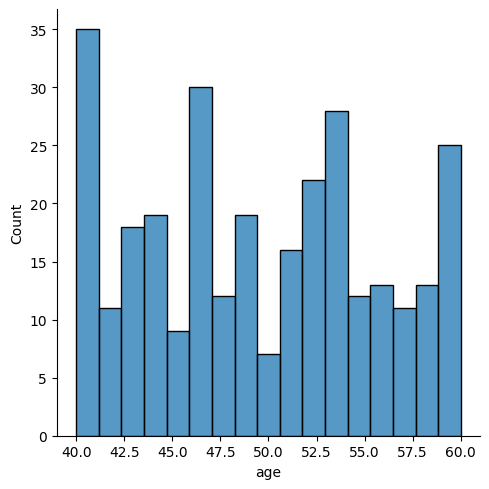

In [957]:
sns.displot(data,x="age",bins=round(sqrt(len(data))))

plt.show()


- Tworze szereg rozdzielczy przedziałowy z sqrt(n) ilością klas.

In [969]:

n = len(data)
bins = int(np.sqrt(n))

age_min = np.min(data['age'])
age_max = np.max(data['age'])

bin_edges = np.linspace(age_min, age_max, bins+1)  

data['age_bin'] = pd.cut(data['age'], bins=bin_edges, include_lowest=True)

observed = data['age_bin'].value_counts().sort_index()

expected = [n / len(observed)] * len(observed)

print(observed)
print()
print(f"{expected}")
print()

chi2_stat, p_value = chisquare(observed,expected)

print(f" p-value {p_value} wartosc Chi_2 {chi2_stat}, bins : {bins} ")



age_bin
(39.999, 41.176]    35
(41.176, 42.353]    11
(42.353, 43.529]    18
(43.529, 44.706]    19
(44.706, 45.882]     9
(45.882, 47.059]    30
(47.059, 48.235]    12
(48.235, 49.412]    19
(49.412, 50.588]     7
(50.588, 51.765]    16
(51.765, 52.941]    22
(52.941, 54.118]    28
(54.118, 55.294]    12
(55.294, 56.471]    13
(56.471, 57.647]    11
(57.647, 58.824]    13
(58.824, 60.0]      25
Name: count, dtype: int64

[17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413, 17.647058823529413]

 p-value 1.1241865596542625e-06 wartosc Chi_2 58.019999999999996, bins : 17 


- Kazdy przedzial ma 5 lub wiecej obserwacji, wiec zalozenie jest rownieez spelnione.

- p-value jest równiez w tym przypadku mniejsze od 0.05, zatem istnieją podstawy do odrzuenia hipotezy H0.

- ODP: Rozklad wieku pacjentów nie jest jednostajny.

# ZADANIE 2

## Hipotezy
- **Hipoteza zerowa (H₀):** Nie ma zależności między płcią a grupą.
- **Hipoteza alternatywna (H₁):** Istnieje zależność między płcią a grupą.

- Do sprawdzenia zaleznosci uzyje testu niezaleznosci chi_kwadrat o (kolumny-1)*(wiersze-1) stopniach swobody

$$
\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$


In [980]:


pivot_tab = pd.crosstab(index=data["gender"],columns=data["group"])

print(pivot_tab)

chi2_stat, p_value, dof, ex =chi2_contingency(pivot_tab)
print()
print(f" chi^2 value {chi2_stat}")
print(f" p-value {p_value}")
print(f" liczba stopni swobody {dof}")
print(f" Oczekiwane wartosci (O-E)^2/E {ex}")



group    C   P   T
gender            
K       49  39  51
M       51  61  49

 chi^2 value 3.3245453326779573
 p-value 0.1897073483050253
 liczba stopni swobody 2
 Oczekiwane wartosci (O-E)^2/E [[46.33333333 46.33333333 46.33333333]
 [53.66666667 53.66666667 53.66666667]]


- Dodatkowo spelnia zalozenia co do ilosci wartosci observed i expected w kazdej komórce, (min 5). 

- P-value jest wieksze od 0.05 zatem nie ma podstaw do odrzucenia hipotezy H0.

- Odp : Nie ma istotnej zależności między przydziałem do grupy a płcią. 

# ZADANIE 3




**Hipotezy:**


$$
H_0: \rho = 0 \quad \text{ Początkowa masa ciała pacjentów nie jest zależna od wieku.}
$$

$$
H_1: \rho \neq 0 \quad \text{Początkowa masa ciała pacjentów jest zależna od wieku.}
$$

- Uzywam statytyki która testuje istotność korelacji.

- Liczę korelacje pearsona.


$$
t = \frac{r \sqrt{n - 2}}{\sqrt{1 - r^2}}, \quad dof = n - 2
$$

- gdzie r - korelacja

In [990]:
# pearson

print(data.head())

korelacja = data["weight0"].corr(data["age"])

quantity = len(data)

statystyka =korelacja/sqrt(1-korelacja**2)*sqrt(quantity-2)


print(t.ppf(1-0.05/2,quantity-2))
print(f" wartosc korelacji {korelacja} statystyka policzona {statystyka}")

print(f" {abs(statystyka)>1-t.ppf(0.05/2,quantity-2)} |t| < wartosc ")


# dopisac intepretacje i jedna rzecz


   patient_index gender group  age  weight0  weight1           age_bin  \
0              1      M     T   40      144      136  (39.999, 41.176]   
1              2      K     T   51       95       85  (50.588, 51.765]   
2              3      K     T   41       54       44  (39.999, 41.176]   
3              4      K     T   53       79       65  (52.941, 54.118]   
4              5      K     T   49       90       77  (48.235, 49.412]   

   weight_diff  
0           -8  
1          -10  
2          -10  
3          -14  
4          -13  
1.9679565064965066
 wartosc korelacji -0.02399878527461819 statystyka policzona -0.41440261968896835
 False |t| < wartosc 


- $$\text{Gdy } |t| > t_\alpha \text{ to odrzucamy } H_0$$

- Wartosc statystyki nie jest większa od wartosci odczytanej z rozkladu t-studenta, zatem nie ma podstaw do odrzucenia hipotezy H0.


- ODP: Początkowa masa pacjentów nie jest zależna od wieku.

# ZADANIE 4


- Postanowiłem wziąc średnie zmiany masy ciała pacjentów i sprawdzić czy sie róznia.

**Hipotezy:**

$$
H_0: \mu_1 = \mu_2 \quad \text{(Średnia zmiana masy ciała jest taka sama w obu grupach)}
$$

$$
H_1: \mu_1 \neq \mu_2 \quad \text{(Średnia zmiana masy ciała różni się między grupami)}
$$

- uzywam statystyki t-studenta = n1+n2-2 stopni swobody.

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{S_p^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$

gdzie :

$$
S_p^2 = \frac{(n_1 - 1) S_1^2 + (n_2 - 1) S_2^2}{n_1 + n_2 - 2}
$$

- Na poczatek sprawdzam czy rozklady roznice wagowe dla mezczyzn i kobiet sa normalne, czego wymaga statystyka.


 shapiro p-value  MEN :0.7396069992143217 WOMAN 0.5133626241354994


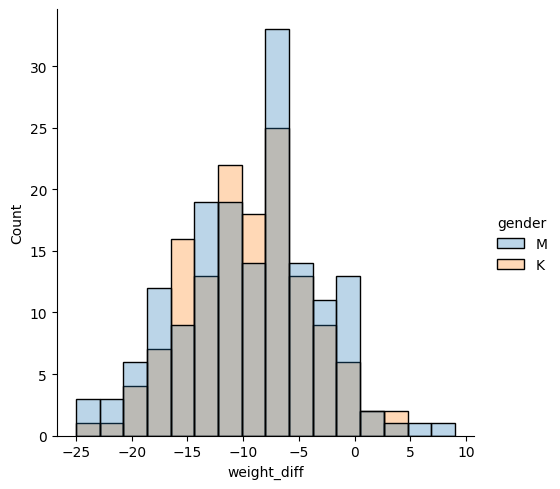

In [991]:


data['weight_diff'] = data['weight1'] - data['weight0']


diff_M = data[data["gender"] =="M"]["weight_diff"]

diff_K = data[data["gender"] =="K"]["weight_diff"]

wartosc_k_2,p_value_k_2 = shapiro(diff_K)

wartosc_m_2,p_value_m_2 = shapiro(diff_M)

print(f" shapiro p-value  MEN :{p_value_k_2} WOMAN {p_value_m_2}")


sns.displot(data,kind="hist",hue="gender",x="weight_diff",alpha=0.3)

plt.show()


- dla mezczyzn i kobiet test shapiro wilka wychodzi p-value wieksze od 0.05 tzn ze nie ma podstaw do odrzucenia hipotezu w tescie shapiro wilka. Zatem mozemy przyjac ze rozklady sa normalne

- Dodatkowo wykres sugeruje 'na oko' ze nie ma zaleznosci miedzy efektami po pol roku a plcia.

- Policzmy zatem statystyke

In [992]:

fetched = data.loc[:,["gender","weight_diff"]]

gender_stats = fetched.groupby('gender')['weight_diff'].agg(['mean','count'])

mean_K = gender_stats.loc['K', 'mean']
mean_M = gender_stats.loc['M', 'mean']

var_K = data[data["gender"]=="K"]["weight_diff"].var(ddof=1)
var_M = data[data["gender"]=="M"]["weight_diff"].var(ddof=1)

count_K = gender_stats.loc['K', 'count']
count_M = gender_stats.loc['M', 'count']

print(gender_stats)

pooled_variance = (var_K*(count_K-1) +var_M*(count_M-1))/(count_K+count_M-2)

statystyka = (mean_M-mean_K)/sqrt(pooled_variance*(1/count_K +1/count_M))

print(statystyka)

print(count_K+count_M-2)

crit_left =crit_value = t.ppf(0.025/2,count_K+count_M-2)

crit_right =crit_value = t.ppf(1-0.025/2,count_K+count_M-2)

print(f" wartosc statystyki {statystyka} LEWO {crit_left} PRAWO {crit_right}")


            mean  count
gender                 
K      -9.712230    139
M      -9.335404    161
0.5546069093833752
298
 wartosc statystyki 0.5546069093833752 LEWO -2.252785178400417 PRAWO 2.2527851784004183


- Obliczona statystyka nie wpada w przedzialy krytyczne tzn (-inf,-2.25] i [2.25,+inf), zatem nie ma podstaw do odrzucenia hipotezy H0

- ODP : Efekt terapii nie jest zależny od plci.

# ZADANIE 5

- grupa T to testowa, P - placebo, C - kontrolna 

## **Hipotezy:**

### PYTANIE 1 : Czy testowany lek pomaga pacjentom schudnąć?

$$
H_0: \mu_T = \mu_P = \mu_C \quad \text{Średnia utrata masy ciała w grupie (T) jest taka sama jak w grupach (P) i (C).}
$$

$$
H_1: \mu_T \neq \mu_P \neq \mu_C \quad \text{Średnia utrata masy ciała w grupie (T) różni się od średniej w grupach (P) i (C).}
$$

---

###  PYTANIE 2 : Czy występuje efekt placebo?

$$
H_0: \mu_P = \mu_C \quad \text{Średnia utrata masy ciała w grupie (P) jest taka sama jak w grupie (C).}
$$

$$
H_1: \mu_P \neq \mu_C \quad \text{Średnia utrata masy ciała w grupie (P) różni się od średniej w grupie (C).}
$$



- Anova ma 2 zalożenia jednorodnosc wariancji i to ze dane maja rozklad normalny.

- Ponizej sprawdzam te zalozenia 


- **Sprawdzenie rozkladu normalnego**

In [993]:

group_T = data[data['group'] == 'T']['weight_diff']
group_P = data[data['group'] == 'P']['weight_diff']
group_C = data[data['group'] == 'C']['weight_diff']

print(" Grupa T:", shapiro(group_T))
print(" Grupa P:", shapiro(group_P))
print(" Grupa C:", shapiro(group_C))


 Grupa T: ShapiroResult(statistic=0.9809468598873242, pvalue=0.15743977302434586)
 Grupa P: ShapiroResult(statistic=0.9908091841892199, pvalue=0.7298032244549508)
 Grupa C: ShapiroResult(statistic=0.9803686851900576, pvalue=0.14200557066248692)


- Kazda grupa ma rozklad normalny poniewaz p-value jest wieksze w kazdej od 0.05

- **Sprawdzenie jednorodnosci wariancji**

In [994]:
print(f" wyniki testu levena:  {levene(group_T, group_P, group_C) }")


 wyniki testu levena:  LeveneResult(statistic=0.7740067160270703, pvalue=0.4620895516741159)


- W tescie levena p-value jest wieksze od 0.05 zatem nie ma podstaw do odrzucenia H0. 

- Zatem, nie ma istotnych roznic pomiedzy grupami w wariancjach.

- **obliczenie statystyki F**

In [995]:
anova = f_oneway(group_T, group_P, group_C)
print(f" wyniki anovy :  {anova}")

 wyniki anovy :  F_onewayResult(statistic=34.50730032521868, pvalue=3.348257253957477e-14)


- Otrzymujemy p-value mniejsze od 0.05, zatem odrzucam hipoteze H0 z pierwszego pytania, srednie się roznia.

- Zatem istnieje istotna różnica w zmianach masy ciała pomiędzy przynajmniej jedną z par grup.

**ANALIZA POST-HOC**

In [996]:
tukey_test = pairwise_tukeyhsd(endog=data['weight_diff'], groups=data['group'], alpha=0.05)
print(tukey_test)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     C      P    -4.26    0.0 -6.0248 -2.4952   True
     C      T    -6.06    0.0 -7.8248 -4.2952   True
     P      T     -1.8 0.0444 -3.5648 -0.0352   True
----------------------------------------------------


**Wnioski :**

- **pytanie_1**

- Roznica srednich w grupie testowej i grupie kontrolnej wynosi -6.06.

- Roznica srednich w grupie testowej i grupie placebo wynosi -1.8.

- Zatem grupa Testowa schudla wiecej niz grupa placebo i grupa kontrolna.

- dodatkowo p-value-adj w odbydwu mniejsze jest od 0.05.

- ODP: Lek pomaga pacjentom schudnąć, Bo chudną wiecej w porownaniu do innych grup.

- **pytanie_2**

- Średnia redukcja kg w grupie placebo jest większa niż w grupie kontrolnej , dodatkowo Reject =True (bo p-value adj jest mniejsze od 0.05 w kazdym przypadku).

- Czyli branie placebo pomaga spalać kalorie.

- Odrzucamy H0 z pytania drugiego. 

- ODP: Istnieje efekt placebo.


# ZADANIE 6


**Hipotezy:**

- Przez stwierdzenie 'istotne efekty' rozumiem ze pacjenci schudli


H_0: Średnia zmiana masy ciała wynosi 0, czyli brak efektu diety i ćwiczeń (pacjenci nie schudli).

$$
H_0: \mu_0 = 0
$$

H_1: Średnia zmiana masy ciała jest mniejsza niż 0, czyli pacjenci schudli (efekt diety i ćwiczeń).

$$
H_1: \mu_0 < 0
$$

- uzywam statystyki o n-1 stopniach swobody

$$
t = \frac{(\bar{X} - \mu_0) \sqrt{n}}{s}
$$





In [997]:
print(data.head())


fetched_mean = data[data["group"]=="C"]["weight_diff"].mean()
fetched_std = data[data["group"]=="C"]["weight_diff"].std(ddof=1)

quantity_all = len(data[data["group"]=="C"])

m_0 = 0

# sprawdzamy czy rozklad nie jest normalny

wartosc_m,p_value_m = shapiro(data[data["group"]=="C"]["weight_diff"])

print(f" {p_value_m}")



   patient_index gender group  age  weight0  weight1           age_bin  \
0              1      M     T   40      144      136  (39.999, 41.176]   
1              2      K     T   51       95       85  (50.588, 51.765]   
2              3      K     T   41       54       44  (39.999, 41.176]   
3              4      K     T   53       79       65  (52.941, 54.118]   
4              5      K     T   49       90       77  (48.235, 49.412]   

   weight_diff  
0           -8  
1          -10  
2          -10  
3          -14  
4          -13  
 0.14200557066248692


- p-value wieksze 0.05 zatem rozklad jest normalny

In [998]:


print(f"ilosc : {quantity_all} wartosc sredniej z hipotezy zerowej {m_0} srednia obliczona: {fetched_mean} obliczone std {fetched_std}")

statystyka_2 = (fetched_mean-m_0)*sqrt(quantity_all)/fetched_std

print(f" statystyka obliczona {statystyka_2} wartosc krytyczna {t.ppf(0.05/2,quantity_all-1)}")

print()



ilosc : 100 wartosc sredniej z hipotezy zerowej 0 srednia obliczona: -6.07 obliczone std 4.989392789111758
 statystyka obliczona -12.16580906046609 wartosc krytyczna -1.9842169515086832



- Wartosc obliczona wpada w przedzial krytyczny (jest mniejsze od approx -2) zatem istnieja podstawy do odrzucenia hipotezy H0.

- ODP: Sama dieta połączona z ćwiczeniami daje istotne efekty.